# Assignment

**Name:** Abhay  
**ID:** 08117702023  
**Class:** BCA V-B  
**Assistant Professor:** Mamta Madan  

---

## Questions based on Linear Regression

**Instructor:** Mamta Madan  
**Points:** 100  
**Due Date:** 22 Aug  

---  

# Q4 Perform all the important functions on IRIS dataset. Preprocess the IRIS dataset

In [103]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
iris = load_iris()
df = pd.DataFrame(data=iris.data , columns= iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [34]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
df.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [36]:
df.shape

(150, 5)

In [37]:
df.dtypes
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [39]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [40]:
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
142,5.8,2.7,5.1,1.9,virginica


In [41]:
df.drop_duplicates(inplace=True)

In [42]:
# 2. Choose target & features
# Predict "petal length (cm)" from other numeric features
X = df.drop(columns=['petal length (cm)', 'species'])
y = df['petal length (cm)']

In [43]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Model Coefficients: [ 0.70711434 -0.66301701  1.45948814]
Intercept: -0.08616496268798812
Mean Squared Error: 0.11834866814413075
R² Score: 0.9624665938425994


#Q5 Implement Linear Regression on two random Arrays of numpy

In [50]:
np.random.seed(42)  # reproducibility
x = np.random.rand(50) * 10  # 50 random values between 0 and 10
y = 3.2 * x + 5 + np.random.randn(50) * 2  # linear relation with noise

In [51]:
# 2. Reshape x for sklearn (needs 2D array for features)
x_reshaped = x.reshape(-1, 1)

In [52]:
# 3. Create and fit the model
model = LinearRegression()
model.fit(x_reshaped, y)


LinearRegression()

In [53]:
y_pred = model.predict(x_reshaped)

In [54]:
# 5. Model evaluation
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R² Score:", r2_score(y, y_pred))

Slope (Coefficient): 3.155313200770622
Intercept: 5.193378548937769
Mean Squared Error: 3.2922845749947487
R² Score: 0.9611377963321445


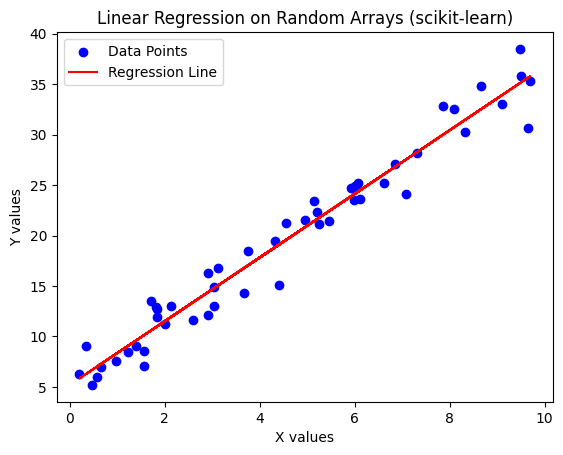

In [55]:
# 6. Plot the data and regression line
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression on Random Arrays (scikit-learn)')
plt.legend()
plt.show()

#Q6 Implement Linear Regression On salary.CSv file discussed in class.

In [56]:
df1 = pd.read_csv("/content/Salary_Data.csv")

In [57]:
df1.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [58]:
df1.shape

(30, 2)

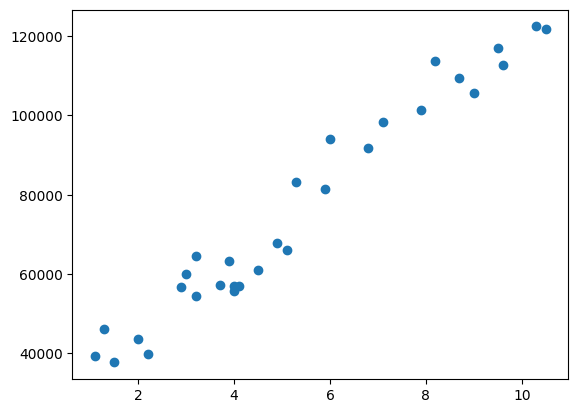

In [60]:
plt.scatter(df1['YearsExperience'] , df1['Salary'])

In [69]:
X = df1[['YearsExperience']] # because of 1D
y = df1['Salary']

In [70]:
X_train , X_test , y_train, y_test = train_test_split(X ,y , random_state=42, test_size=0.2)

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [74]:
y_pred = lr.predict(X_test)

In [75]:
print("Slope (Coefficient):", lr.coef_[0])
print("Intercept:", lr.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Slope (Coefficient): 27151.53742583369
Intercept: 74207.625
Mean Squared Error: 49830096.85590834
R² Score: 0.9024461774180498


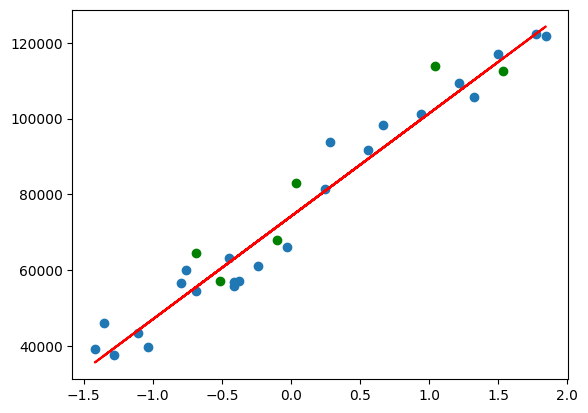

In [78]:
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test ,color = 'g')
plt.plot(X_train,lr.predict(X_train),'r')

# Q7 Implement Linear regression on some unknown datasets.

In [83]:
from sklearn.datasets import fetch_california_housing

In [84]:
california = fetch_california_housing(as_frame=True)
df = california.frame

In [85]:
df.shape

(20640, 9)

In [86]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [88]:
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.25, random_state=42)

In [90]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [91]:
y_pred = lr.predict(X_test)

In [92]:
print("mean square error:",mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

mean square error: 0.5411287478470685
R2 Score: 0.5910509795491354


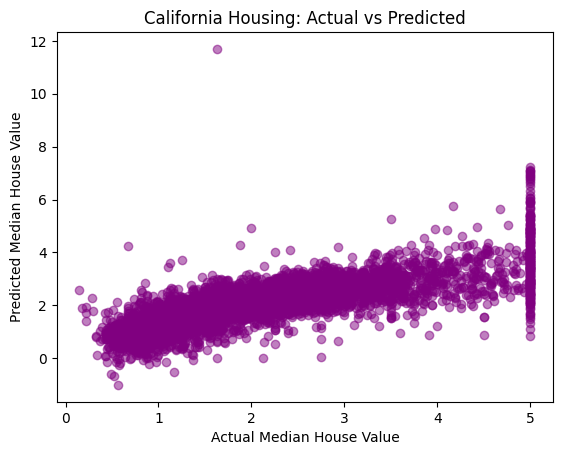

In [93]:
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("California Housing: Actual vs Predicted")
plt.show()

In [126]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), #for non linear feature
    ('lr', LinearRegression())
])

In [127]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('lr', LinearRegression())])

In [128]:
y_pred1 = pipeline.predict(X_test)

In [129]:
print("Mean Square error:" , mean_squared_error(y_test, y_pred1))
print("R2 score:" , r2_score(y_test, y_pred1))

Mean Square error: 0.45478928450616
R2 score: 0.6563005880757491
